## Figures for Sample Reach

In [38]:
## Load participant 7 (will be our sample)
import numpy as np

participantNumber = 10

endOfFileName = "_" + str(participantNumber) + ".npy"
folderOrigin = "new500UnitNetwork/"
resultsNF1 = np.load(folderOrigin + "save_NF1/cartesian_position" + endOfFileName)
targetsNF1 = np.load(folderOrigin + "save_NF1/targets" + endOfFileName)
resultsCF1 = np.load(folderOrigin + "save_CF1/cartesian_position" + endOfFileName)
targetsCF1 = np.load(folderOrigin + "save_CF1/targets" + endOfFileName)
resultsNF2 = np.load(folderOrigin + "save_NF2/cartesian_position" + endOfFileName)
targetsNF2 = np.load(folderOrigin + "save_NF2/targets" + endOfFileName)
resultsCF2 = np.load(folderOrigin + "save_CF2/cartesian_position" + endOfFileName)
targetsCF2 = np.load(folderOrigin + "save_CF2/targets" + endOfFileName)

In [39]:
## convert to cm

print(len(resultsNF1[:, 0, 0]))

for i in range(len(resultsNF1[:, 0, 0])):
    resultsNF1[i, :, 0:2] = (resultsNF1[i, :, 0:2])*100
    resultsCF1[i, :, 0:2] = (resultsCF1[i, :, 0:2])*100
    resultsNF2[i, :, 0:2] = (resultsNF2[i, :, 0:2])*100
    resultsCF2[i, :, 0:2] = (resultsCF2[i, :, 0:2])*100

    targetsNF1[i, :, 0:2] = (targetsNF1[i, :, 0:2])*100
    targetsCF1[i, :, 0:2] = (targetsCF1[i, :, 0:2])*100
    targetsNF2[i, :, 0:2] = (targetsNF2[i, :, 0:2])*100
    targetsCF2[i, :, 0:2] = (targetsCF2[i, :, 0:2])*100


#newResultsNF1 = (resultsNF1[0, :, 0:2])*100

800


In [40]:
import matplotlib.pyplot as plt

def plotReaches(xy, target_xy, title):
    plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
    target_x = (target_xy[:, -1, 0])
    target_y = (target_xy[:, -1, 1])
    for i in range(8):
        plt.plot(target_xy[i,:,0],target_xy[i,:,1],color="r",linewidth=0.5) ## target straight line reach
        plt.plot((xy[i,:,0]),(xy[i,:,1]),color="#4F2683",linewidth=1.0) ## actual reach
    plt.scatter(target_x, target_y)
    plt.axis([-15, 15, 30, 60])
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.title(title)
    saveLocation = folderOrigin + "figures/" + title + ".png"
    plt.savefig(saveLocation)


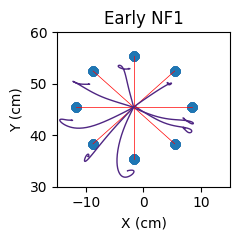

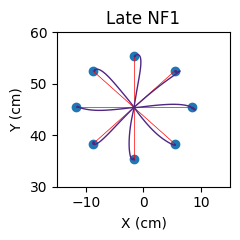

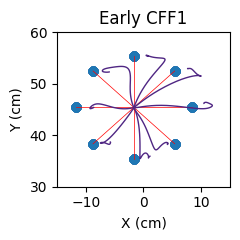

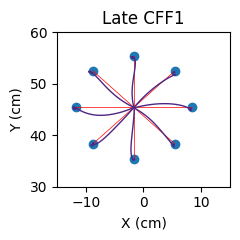

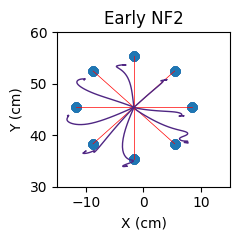

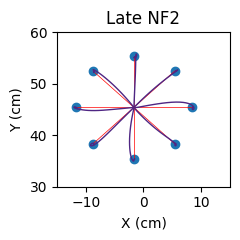

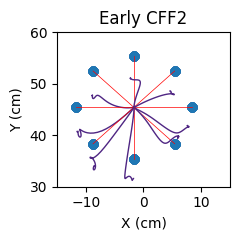

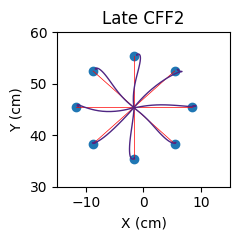

In [41]:
## NF1
plotReaches(resultsNF1[7:, :, :], targetsNF1[7:, :, :], "Early NF1")
plotReaches(resultsNF1[-8:, :, :], targetsNF1[-8:, :, :], "Late NF1")

## CF1
plotReaches(resultsCF1[7:, :, :], targetsCF1[7:, :, :], "Early CFF1")
plotReaches(resultsCF1[-8:, :, :], targetsCF1[-8:, :, :], "Late CFF1")

## NF2
plotReaches(resultsNF2[7:, :, :], targetsNF2[7:, :, :], "Early NF2")
plotReaches(resultsNF2[-8:, :, :], targetsNF2[-8:, :, :], "Late NF2")

## CF2
plotReaches(resultsCF2[7:, :, :], targetsCF2[7:, :, :], "Early CFF2")
plotReaches(resultsCF2[-8:, :, :], targetsCF2[-8:, :, :], "Late CFF2")

## Figures for max deviation

In [42]:
import numpy as np

maxNF1 = np.load(folderOrigin + "postAnalysis/maxNF1.npy")
maxCF1 = np.load(folderOrigin + "postAnalysis/maxCF1.npy")
maxNF2 = np.load(folderOrigin + "postAnalysis/maxNF2.npy")
maxCF2 = np.load(folderOrigin + "postAnalysis/maxCF2.npy")

# convert to cm

for i in range(len(maxNF1[:, 0])):
    maxNF1[i, :] = (maxNF1[i,:]*100)
    maxCF1[i, :] = (maxCF1[i,:]*100)
    maxNF2[i, :] = (maxNF2[i,:]*100)
    maxCF2[i, :] = (maxCF2[i,:]*100)

In [43]:
from scipy.optimize import curve_fit

def printLearningCurves(monoExp, currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2, saveLocation):

    initialGuess = [0.03, 0.01, 0.01]

    plt.figure(figsize=(10, 2.3)).set_tight_layout(True)

    plt.subplot(141)
    plt.scatter(range(len(currMaxNF1)), currMaxNF1, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxNF1), len(currMaxNF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF1, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('NF1')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.subplot(142)
    plt.scatter(range(len(currMaxCF1)), currMaxCF1, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxCF1), len(currMaxCF1))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF1, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('CFF1')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.subplot(143)
    plt.scatter(range(len(currMaxNF2)), currMaxNF2, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxNF2), len(currMaxNF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxNF2, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('NF2')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.subplot(144)
    plt.scatter(range(len(currMaxCF2)), currMaxCF2, s=3, color="grey", alpha=0.5)
    polyline = np.linspace(0, len(currMaxCF2), len(currMaxCF2))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMaxCF2, p0=initialGuess)
    print(opt_params)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=3)
    plt.title('CFF2')
    plt.xlabel("Trial")
    plt.ylabel("Max deviation (cm)")
    plt.axis([-10, 410, 0, 8])

    plt.savefig(saveLocation)

[2.64712173 0.03707536 0.81096071]
[2.00777415 0.01813862 0.82747307]
[1.30753436 0.01724311 0.64856249]
[2.30896998 0.02019828 0.79526353]


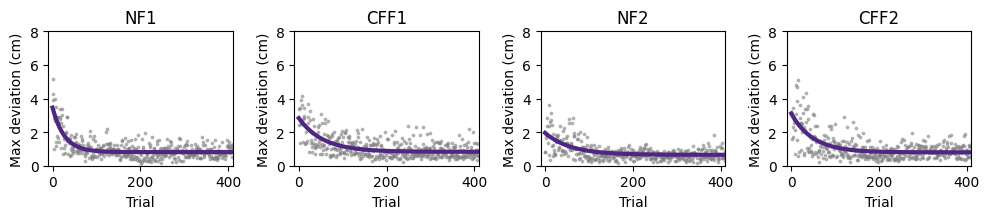

In [44]:
currMaxNF1 = maxNF1[7, :]
currMaxCF1 = maxCF1[7, :]
currMaxNF2 = maxNF2[7, :]
currMaxCF2 = maxCF2[7, :]

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

saveLocation = folderOrigin + "figures/maxDeviationCurves7"

printLearningCurves(monoExp, currMaxNF1, currMaxCF1, currMaxNF2, currMaxCF2, saveLocation)

## Figures for average learning curves

In [45]:
import numpy as np

maxNF1 = np.load(folderOrigin + "postAnalysis/maxNF1.npy")
maxCF1 = np.load(folderOrigin + "postAnalysis/maxCF1.npy")
maxNF2 = np.load(folderOrigin + "postAnalysis/maxNF2.npy")
maxCF2 = np.load(folderOrigin + "postAnalysis/maxCF2.npy")

# convert to cm

for i in range(len(maxNF1[:, 0])):
    maxNF1[i, :] = (maxNF1[i,:]*100)
    maxCF1[i, :] = (maxCF1[i,:]*100)
    maxNF2[i, :] = (maxNF2[i,:]*100)
    maxCF2[i, :] = (maxCF2[i,:]*100)

In [46]:
avgMaxNF1 = np.mean(maxNF1, axis=0)
avgMaxCF1 = np.mean(maxCF1, axis=0)
avgMaxNF2 = np.mean(maxNF2, axis=0)
avgMaxCF2 = np.mean(maxCF2, axis=0)

/tmp/ipykernel_2528535/3464358938.py:2: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b
/tmp/ipykernel_2528535/3464358938.py:2: RuntimeWarning: overflow encountered in multiply
  return m * np.exp(-t * x) + b


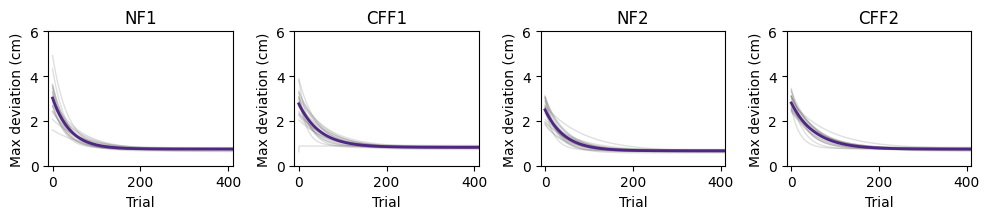

In [47]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

initialGuess = [3, 1, 1]

plt.figure(figsize=(10, 2.3)).set_tight_layout(True)

plt.subplot(141, title="NF1", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxNF1[:,0])):
    currMax = maxNF1[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxNF1
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.subplot(142, title="CFF1", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxCF1[:,0])):
    currMax = maxCF1[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxCF1
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.subplot(143, title="NF2", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxNF2[:,0])):
    currMax = maxNF2[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxNF2
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.subplot(144, title="CFF2", xlabel="Trial", ylabel="Max deviation (cm)")
plt.axis([-10, 410, 0, 6])
for i in range(len(maxCF2[:,0])):
    currMax = maxCF2[i, :]
    polyline = np.linspace(0, len(currMax), len(currMax))
    opt_params, param_cov = curve_fit(monoExp, polyline, currMax, p0=initialGuess)
    A, K, C = opt_params
    fit_y = monoExp(polyline, A, K, C)
    plt.plot(polyline, fit_y, "-", color="grey",linewidth=1, alpha=0.25)
#average
currAvg = avgMaxCF2
polyline = np.linspace(0, len(currAvg), len(currAvg))
opt_params, param_cov = curve_fit(monoExp, polyline, currAvg, p0=initialGuess)
A, K, C = opt_params
fit_y = monoExp(polyline, A, K, C)
plt.plot(polyline, fit_y, "-", color="#4F2683",linewidth=2)

plt.savefig(folderOrigin + "figures/maxDeviationLearningCurves")


In [67]:
def annotate_barplot_significance(num1, num2, p, center, height, yerr, ylims, dh=0.05, barh = 0.05, fs=None):
    #https://stackoverflow.com/questions/11517986/indicating-the-statistically-significant-difference-in-bar-graph
    if p < 0.001:
        sig_symbol = '***'
    elif p < 0.01:
        sig_symbol = '**'
    elif p < 0.05: 
        sig_symbol = "*"
    else:
        sig_symbol = "n. s."

    lx, ly = 0, height[0]
    rx, ry = 1, height[1]

    if yerr:
        ly += yerr[0]
        ry += yerr[1]

    ax_y0, ax_y1 = ylims[0], ylims[1]
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2 , y+barh)
    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    plt.text(*mid, sig_symbol, **kwargs)

def create_bar_plot(x_axis, y_axis, data1, data2, p_value, ylims, ylabel, saveLocation):
    colors = ["grey", "#4F2683"]

    plt.figure(figsize=(2.5, 2.5)).set_tight_layout(True)
    plt.rc('font', size = 13)
    yerror = [(np.std(data1)/np.sqrt(np.size(data1))), (np.std(data2)/np.sqrt(np.size(data2)))]
    print(yerror)
    plt.bar(x_axis, y_axis, color=colors, yerr = yerror, capsize=5)
    annotate_barplot_significance(0, 1, p_value, [0, 1], y_axis, yerror, ylims)
    plt.ylabel(ylabel)
    plt.ylim(ylims)
    plt.savefig(saveLocation)

## Figures for comparing first 2.5% (initial performance)

In [68]:
# extract first 5% for each curve
import numpy as np

initialMaxNF1 = maxNF1[:, 0:10]
initialMaxCF1 = maxCF1[:, 0:10]
initialMaxNF2 = maxNF2[:, 0:10]
initialMaxCF2 = maxCF2[:, 0:10]

initialPerParticipantNF1 = np.mean(initialMaxNF1, axis=1) ## switch to axis 1
initialPerParticipantCF1 = np.mean(initialMaxCF1, axis=1)
initialPerParticipantNF2 = np.mean(initialMaxNF2, axis=1)
initialPerParticipantCF2 = np.mean(initialMaxCF2, axis=1)

avgInitialNF1 = np.mean(initialPerParticipantNF1) # averaging the first 20 trials for each participant, and averaging all participants
avgInitialCF1 = np.mean(initialPerParticipantCF1) 
avgInitialNF2 = np.mean(initialPerParticipantNF2) 
avgInitialCF2 = np.mean(initialPerParticipantCF2) 


0.09650495909338735
[0.14875461003839371, 0.09656650326492203]
0.690859953826739
[0.12420160632907067, 0.09428923299645034]


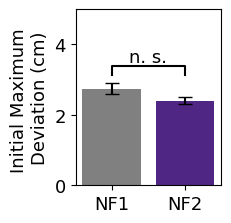

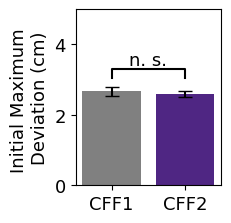

In [69]:
from scipy.stats import ttest_rel

figuresSaveLocation = folderOrigin + "figures/"

## INITIAL DEVIATION PLOTS
t_statistic, p_value = ttest_rel(initialPerParticipantNF1, initialPerParticipantNF2)
print(p_value)
create_bar_plot(['NF1', 'NF2'], [avgInitialNF1, avgInitialNF2], initialPerParticipantNF1, initialPerParticipantNF2, p_value, [0,5], "Initial Maximum \nDeviation (cm)", figuresSaveLocation + "initialNFbar")

t_statistic, p_value = ttest_rel(initialPerParticipantCF1, initialPerParticipantCF2)
print(p_value)
create_bar_plot(['CFF1', 'CFF2'], [avgInitialCF1, avgInitialCF2], initialPerParticipantCF1, initialPerParticipantCF2, p_value, [0,5], "Initial Maximum \nDeviation (cm)", figuresSaveLocation + "initialCFFbar")

In [70]:
parametersPerParticipantNF1 = np.load(folderOrigin + "postAnalysis/funcParametersNF1.npy")
parametersPerParticipantCF1 = np.load(folderOrigin + "postAnalysis/funcParametersCF1.npy")
parametersPerParticipantNF2 = np.load(folderOrigin + "postAnalysis/funcParametersNF2.npy")
parametersPerParticipantCF2 = np.load(folderOrigin + "postAnalysis/funcParametersCF2.npy")

ratePerParticipantNF1 = (parametersPerParticipantNF1[1:,1]*100)
ratePerParticipantCF1 = (parametersPerParticipantCF1[1:, 1]*100)
ratePerParticipantNF2 = (parametersPerParticipantNF2[1:, 1]*100)
ratePerParticipantCF2 = (parametersPerParticipantCF2[1:, 1]*100)

avgRateNF1 = np.mean(ratePerParticipantNF1)
avgRateCF1 = np.mean(ratePerParticipantCF1)
avgRateNF2 = np.mean(ratePerParticipantNF2)
avgRateCF2 = np.mean(ratePerParticipantCF2)

0.7249288265405315
[0.16616558425518282, 0.1961105181734579]
0.6592253540189313
[0.2380540811979672, 0.1961105181734579]


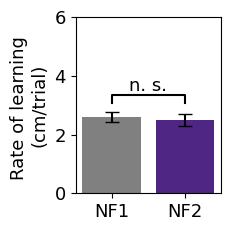

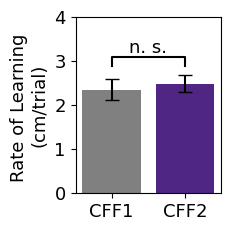

In [71]:
## AVERAGE RATE PLOTS
t_statistic, p_value = ttest_rel(ratePerParticipantNF1, ratePerParticipantNF2)
print(p_value)
create_bar_plot(['NF1', 'NF2'], [avgRateNF1, avgRateNF2], ratePerParticipantNF1, ratePerParticipantNF2, p_value, [0,6], "Rate of learning \n(cm/trial)", figuresSaveLocation + "rateNFbar")

t_statistic, p_value = ttest_rel(ratePerParticipantCF1, ratePerParticipantCF2)
print(p_value)
create_bar_plot(['CFF1', 'CFF2'], [avgRateCF1, avgRateCF2], ratePerParticipantCF1, ratePerParticipantCF2, p_value, [0,4], "Rate of Learning \n(cm/trial)", figuresSaveLocation + "rateCFFbar")

In [72]:
# extract final 5% for each curve
import numpy as np

finalMaxNF1 = maxNF1[:, -10:]
finalMaxCF1 = maxCF1[:, -10:]
finalMaxNF2 = maxNF2[:, -10:]
finalMaxCF2 = maxCF2[:, -10:]

finalPerParticipantNF1 = np.mean(finalMaxNF1, axis=1)
finalPerParticipantCF1 = np.mean(finalMaxCF1, axis=1)
finalPerParticipantNF2 = np.mean(finalMaxNF2, axis=1)
finalPerParticipantCF2 = np.mean(finalMaxCF2, axis=1)

avgFinalNF1 = np.mean(finalPerParticipantNF1) # averaging the first 20 trials for each participant, and averaging all participants
avgFinalCF1 = np.mean(finalPerParticipantCF1) 
avgFinalNF2 = np.mean(finalPerParticipantNF2) 
avgFinalCF2 = np.mean(finalPerParticipantCF2) 

0.1992041421902031
[0.021905123252471986, 0.026077999021093635]
0.6430728461030668
[0.023153073205896293, 0.024983505712875987]


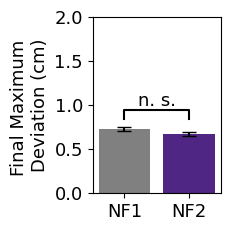

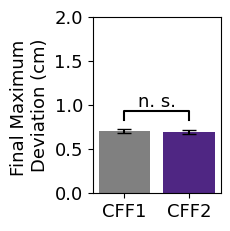

In [73]:
## FINAL DEVIATION PLOTS
t_statistic, p_value = ttest_rel(finalPerParticipantNF1, finalPerParticipantNF2)
print(p_value)
create_bar_plot(['NF1', 'NF2'], [avgFinalNF1, avgFinalNF2], finalPerParticipantNF1, finalPerParticipantNF2, p_value, [0,2], "Final Maximum \nDeviation (cm)", figuresSaveLocation + "finalNFbar")

t_statistic, p_value = ttest_rel(finalPerParticipantCF1, finalPerParticipantCF2)
print(p_value)
create_bar_plot(['CFF1', 'CFF2'], [avgFinalCF1, avgFinalCF2], finalPerParticipantCF1, finalPerParticipantCF2, p_value, [0,2], "Final Maximum \nDeviation (cm)", figuresSaveLocation + "finalCFFbar")